<a href="https://colab.research.google.com/github/GabrielTrentino/Competicoes/blob/master/Naufr%C3%A1gio_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio Kaggle do Titanic:

**O Desafio do Titanic** é uma das competições mais conhecidas no [Kaggle.com](https://www.kaggle.com/c/titanic) e, sem sombra de dúvidas, é uma das melhores primeiras experiências para "mergulhar" no mundo de *Machine Learning*.

Com o objetivo único de **familiarizar os novos Cientistas de Dados com as estrutura e as dinâmicas do Kaggle**, O desafio do Titanic é o equivalente ao "Olá Mundo!" para os Cientistas de Dados.

![](https://github.com/GabrielTrentino/Competicoes/blob/master/img/0Titanic.jpg?raw=true)

Sem dúvidas, o naufrágio do Titanic é um dos incidentes mais conhecidos pelo mundo, foi digno do famoso filme de mesmo nome. O evento ocorreu no dia 15 de Abril de 1912 **resultando na morte de 1502 pessoas de 2224**(entre passageiros e tripulação). 

Enquanto houve algum elemento de sorte envolvida nessa chance de sobrevivência do naufragio, houve uma maior probabilidade de sobrevivência entre um grupo e outro. E nosso objetivo é investigar essas chances, proporções, probabilidades com os dados fornecidos pelo Kaggle!

Essa competição, além da Análise Exploratória de Dados, também pede a elaboração de um **Modelo Preditivo** de *Machine Learning* **capaz de dizer se uma pessoa teria ou não chances de sobreviver.**

##Importação das Bibliotecas Essenciais:

Inicialmente, importaremos as bibliotecas essenciais para manipulação dos dados (como Pandas, Numpy) e outras focadas para criação de gráficos (Matplotlib.Pyplot e Seaborn).

In [1]:
#Importando as bibliotecas necessárias:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# configurar a visualização
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Importação dos Arquivos disponibilizados no Kaggle:

A Importação desses arquivos são feitos de forma simplificada através do seguinte [Tutorial em Inglês](https://medium.com/@opalkabert/downloading-kaggle-datasets-into-google-colab-fb9654c94235). O processo de Identificação de Upload do Token gerado pelo Kaggle é ocultado.

In [2]:
# Pedindo ao Pandas que leia os arquivos ".csv" e transforme em DataFrame:
url_train = 'https://raw.githubusercontent.com/GabrielTrentino/Competicoes/master/00-datasets/Titanic-train.csv'
url_test = 'https://raw.githubusercontent.com/GabrielTrentino/Competicoes/master/00-datasets/Titanic-test.csv'

train = pd.read_csv(url_train)
test = pd.read_csv(url_test)

O arquivo `train.csv` contém as informações relativas ao treino do modelo (contendo a informação se a pessoa sobreviveu ou não). 

O arquivo `test.csv` contém as informações relativas ao teste do modelo, exceto as informações de sobrevivência.

#Análise Exploratória:
A Análise Exploratória é composta por técnicas simples que buscam extrair ou ilustrar as informações contidas nos dados, sem conter nenhuma alteração significativa. Com essa definição, utilizaremos da Visualização de Dados para aumentar a eficiência dessa exploração inicial.

A idéia dessa Análise é trabalharmos ela como uma exploração de hipoteses ou duvidas que possamos ter sobre um Data Set e, por isso, nada melhor que utilizarmos perguntas para instigarmos ou elucidar o que queremos achar.

##Q1. Quais são as variáveis do DataSet?
A primeira pergunta a se fazer é sobre quais são as variáveis iremos utilizar nos modelos, para entendermos melhor, utilizaremos a função `.head()` que nos mostrará as primeiras entradas do DataSet e cruzaremos as informações com o que é descrito no Kaggle para criarmos nosso **Dicionário de Variáveis**.

In [3]:
# Mostrando a primeira entrada dos dados de Treino:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
# Mostrando a primeira entrada dos dados de Teste:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


Primeiramente, podemos observar que nos dados de Treino há uma variável que não está presente no sub conjunto de dados de Teste, que é `Survived`. Essa variável diz se a pessoa em questão sobreviveu ou não ao acidente.

Para que possamos entender qual é o significado de cada variável presente no Datasets, é feito aqui, um dicionário explicando essas variáveis:

*  `PassengerId`- Identificação do Passageiro, no dataset de treino varia de 1 a 891 e no dataset de teste varia de 892 a 1309.
*  `Survived`- Se o passageiro sobreviveu ou não.
*  `Pclass` - Classe do Ticket.
*  `Name` - Nome do Passageiro.
*  `Sex` - Sexo da pessoa.
*  `Age` - Idade.
*  `SibSp` -  Número de irmãos presentes no navio.
*  `Parch` - Número de parentes presentes no navio.
*  `Ticket` - Número do Ticket.
*  `Fare` - Tarifa do Passageiro.
*  `Cabin` - Número da Cabine
*  `Embarked` - Porto de Embarque: C = Cherboug, Q = Queentown, S = Southampton

##Q2. Quais são as dimensões do Data Frame de Treino e Teste?

Um dos passos principais da Análise Exploratória é entender as dimensões desses Data Frames, pois assim, conseguiremos ter uma noção de quantos dados estamos analisando e manipulando.

In [5]:
#Imprimindo a quantidade de linhas e colunas dos Data Frames:
print("O Data Frame de Treino tem: {} linhas e {} colunas".format(train.shape[0], train.shape[1]))
print("O Data Frame de Teste tem: {} linhas e {} colunas".format(test.shape[0], test.shape[1]))

O Data Frame de Treino tem: 891 linhas e 12 colunas
O Data Frame de Teste tem: 418 linhas e 11 colunas


##Q3. Qual a Porcentagem de Instâncias (Linhas) do Data Frame de Treino sobre o Total?

In [6]:
#Imprimindo a % de dados de treino sobre o total:
print("Temos {:.3f}% dos dados estão como treino".format(train.shape[0]/(train.shape[0]+test.shape[0])*100))

Temos 68.067% dos dados estão como treino


##Q4. Qual a quantidade de dados nulos existentes (NaN)?
Uma das preocupações que devemos ter logo na Análise Exploratória é de sabermos a quantidade de dados nulos existentes no Data Frame, pois haverá alguns modelos que não conseguirão trabalhar com esses tipos de dados e, para isso, deveremos contornar de alguma forma. Usamos as funções `.isnull().sum()` que irão verificar se a entrada possui valor nulo e, em seguida, somar (`.sum()`) a quantidade de valores verdadeiros (que são representados por `True` ou `1`).

In [7]:
#Quantos dados nulos estão presentes nesse Data Frame por coluna:
train.isnull().sum().sort_values(ascending=False).head(4)

Cabin       687
Age         177
Embarked      2
Fare          0
dtype: int64

Observando os dados ausentes, pode-se notar que a Idade e a Cabine dos passageiros possuem a maior quantidade de dados vazios.

##Q5. Quais são os tipos de dados das nossas colunas?
Outra preocupação que deve ser investigada logo no começo, pois podemos achar que estamos manipulando valores númericos como `int64` ou `float64`, mas na verdade estaríamos trabalhando com `strings` que são acusados como `object`.

Para isso, utilizamos o atributo `.dtypes`.

In [8]:
#Verificando os tipos das variáveis:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##Q6. Quais são as Descrições Estatísticas?

Outro fator que deve ser observado é as variáveis numericas e suas distribuições, para isso é utilizado `.describe()`

In [9]:
#Informações Estatísticas Descritivas.
train.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


Outra forma de observar a distribuição das variáveis numéricas se da pelo plot dos histogramas das mesmas.

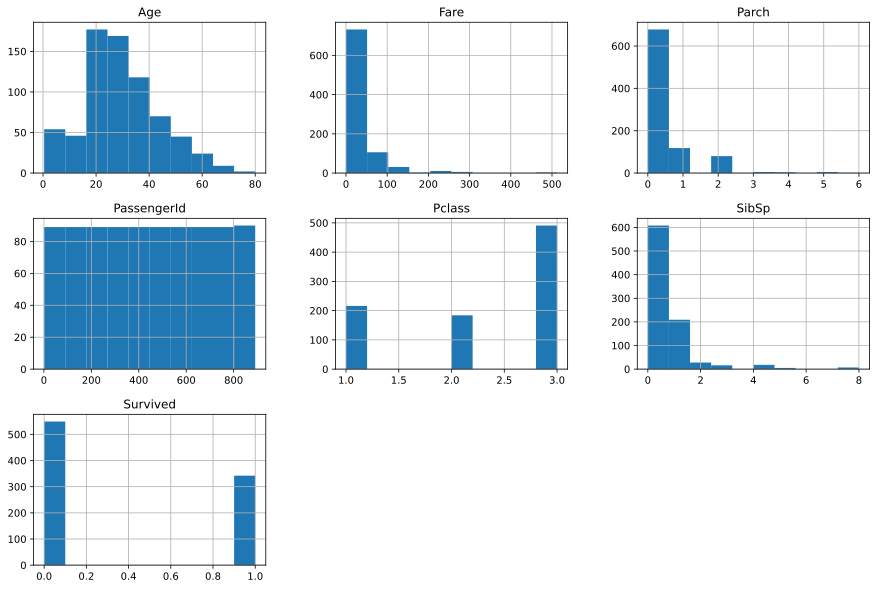

In [10]:
#Plot de Histogramas:
train.hist(figsize = (15,10));

## Q7. Qual é a repetição dos Titulos de nomes?

Quantas vezes os Titulos de nomes (como Mister, Misses, Master, entre outros) se repetem? Afinal, podemos esperar que essa titulação afete na chance de sobrevivência?

In [11]:
#Extraindo os Tituls:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

#Separando os sexos:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Até então, é observado que a maior quantidade de Titulos são para os titulos de `Mr` e `Miss`.

## Primeiras Correções:

*  Primeira correção à ser feita é alterar o Sexo para variáveis binárias (0 e 1);

*  Segunda correção à ser feita é sobre onde os passageiros embarcaram (`C = 1`, `S = 2`, `Q = 3`) se não possuir valor, a variável será 0;

*  Criar uma variável para passageiros que viajaram sozinho (0 para pessoas que viajaram em companhia, 1 para pessoas que foram sozinhas);

*  Extrair os Títulos, separar em categorias e criar novas colunas:
    *  1 = `'Mr`';
    *  2 = `'Miss'` -> 'Miss', 'Ms' e 'Mlle';
    *  3 = `'Mrs'` -> 'Mrs' e 'Mme';
    *  4 = `'Master'`;
    *  5 = `'Raro'` -> 'Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev' e 'Sir';

* Corrigir por Intervalo de Idade:
    * Até 16 anos = Intervalo 1;
    * Entre 17 e 32 = Intervalo 2;
    * Entre 33 e 48 = Intervalo 3;
    * Entre 49 e 64 = Intervalo 4;
    * A partir de 65 = Intervalo 5;


In [12]:
#Datasets que serão corrigidos:
combinar = [train, test]

for dataset in combinar:
  #Arrumando o Sexo female e male para 0 e 1:
  dataset['Sex'] = dataset['Sex'].map(lambda x: 0 if x == 'female' else 1)

  #Arrumando o local de embarque:
  dataset['Embark'] = dataset['Embarked'].map(lambda x: 1 if x == 'C' else 2 if x == 'S' else 3 if x == 'Q' else 0)

  #Criando uma variável para passageiros que viajaram sozinho:
  dataset['Sozinho'] = 0
  dataset.loc[(dataset['SibSp'] + dataset['Parch']) == 0, 'Sozinho'] = 1 

  #Extraindo os nomes:
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

  #Trocando os titulos para variáveis mais comuns:
  dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr'
                                              , 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'], 'Raro')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

  #Criando novas variáveis para testes futuros:
  dataset['Mr'] = dataset['Title'].map(lambda x: 1 if x =='Mr' else 0)
  dataset['Miss'] = dataset['Title'].map(lambda x: 1 if x =='Miss' else 0)
  dataset['Mrs'] = dataset['Title'].map(lambda x: 1 if x =='Mrs' else 0)
  dataset['Master'] = dataset['Title'].map(lambda x: 1 if x =='Master' else 0)
  dataset['Raro'] = dataset['Title'].map(lambda x: 1 if x =='Raro' else 0)

  #Transformando variáveis categoricas em números:
  correcao = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Raro": 5}
  dataset['Title'] = dataset['Title'].map(correcao)

  #Criando um Intervalo de Idade:
  dataset['IntervaloIdade'] = 0

  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'IntervaloIdade'] = 1
  dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'IntervaloIdade'] = 2
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'IntervaloIdade'] = 3
  dataset.loc[( dataset['Age'] > 64), 'IntervaloIdade'] = 4

  dataset.fillna(0, inplace=True)

#Análise da Sobrevivência:

Aqui estarão as análises envolvendo fatores de sobrevivência:

In [13]:
def limpar_grafico(ax):
  ax.set_xlabel('')
  plt.gca().axes.get_yaxis().set_visible(False)

  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

## Q8 Quantas Pessoas Sobreviveram em relação ao Total?

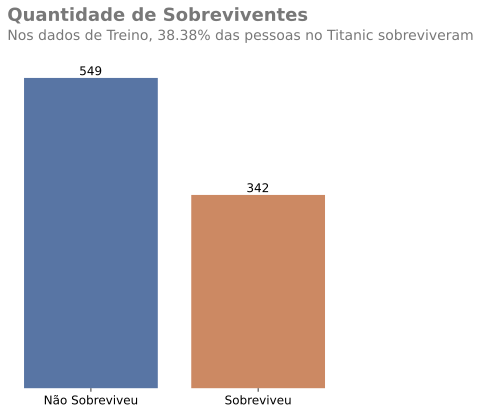

In [14]:
fig, ax = plt.subplots(figsize=(6,6))

ax = sns.countplot(x = 'Survived', data=train, palette='deep')

plt.text(-0.5, 650, 'Quantidade de Sobreviventes',
         fontsize=18, 
         color='#787878',
         weight='bold')

plt.text(-0.5, 635,
         'Nos dados de Treino, {:.2f}% das pessoas no Titanic sobreviveram'.format(342/(342+549)*100),
         verticalalignment="top",
         fontsize=14,
         color='#787878')

limpar_grafico(ax)
for p in ax.patches:
  ax.annotate('{}'.format(p.get_height()),  (p.get_x()+ p.get_width()/2-0.07, p.get_height()+5), size=12)

ax.set_xticklabels(['Não Sobreviveu', 'Sobreviveu'], size=12);

## Q9. Qual a chance de sobrevivência de acordo com o sexo?

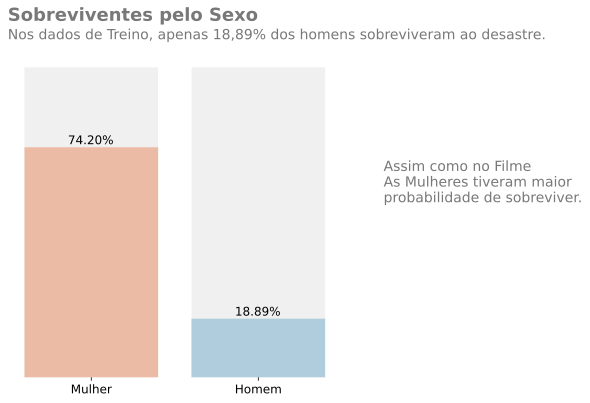

In [15]:
dados_para_plotar = train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

fig, ax = plt.subplots(figsize=(6,6))

sns.barplot(data=[[1],[1]], color="#F0F0F0")
figura = sns.barplot(x='Sex', y='Survived', data=dados_para_plotar, palette='RdBu')

limpar_grafico(ax)

rep = 0
for p in figura.patches:
  rep += 1
  if rep < 3:
    continue
  else:
    figura.annotate('{:.2f}%'.format(p.get_height()*100),  (p.get_x()+ p.get_width()/2-0.14, p.get_height()+0.01), size=12)

plt.text(-0.5,1.15, 'Sobreviventes pelo Sexo',
         fontsize=18, 
         color='#787878',
         weight='bold')

plt.text(-0.5, 1.125,
         'Nos dados de Treino, apenas 18,89% dos homens sobreviveram ao desastre.',
         verticalalignment="top",
         fontsize=14,
         color='#787878')

plt.text(1.75, 0.7,
         'Assim como no Filme\nAs Mulheres tiveram maior\nprobabilidade de sobreviver.',
         verticalalignment="top",
         fontsize=14,
         color='#787878')

ax.set_xticklabels(['Mulher', 'Homem'], size=12)
ax.set_xlabel('');

## Q10. Qual a chance de sobrevivência de acordo com a idade?

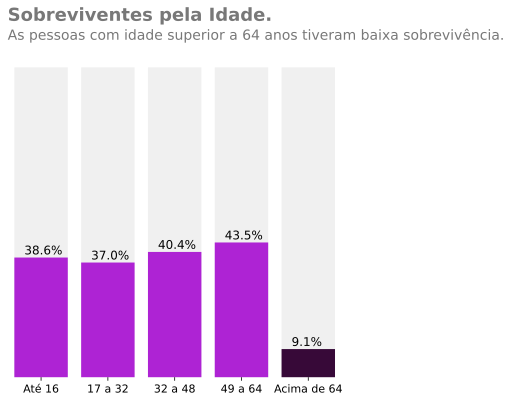

In [16]:
cores = ["#BF05F2", "#BF05F2", "#BF05F2", "#BF05F2", '#3F0140']

dados_para_plotar = train[['IntervaloIdade', 'Survived']].groupby(['IntervaloIdade'], as_index=False).mean()

fig, ax = plt.subplots(figsize=(6,6))

sns.barplot(data=[[1],[1],[1],[1],[1]], color="#F0F0F0")
figura = sns.barplot(x='IntervaloIdade', y='Survived', data=dados_para_plotar, palette=cores)

limpar_grafico(ax)

rep = 0
for p in figura.patches:
  rep += 1
  if rep < 6:
    continue
  else:
    figura.annotate('{:.1f}%'.format(p.get_height()*100),  (p.get_x()+ p.get_width()/2-0.25, p.get_height()+0.01), size=12)

plt.text(-0.5,1.15, 'Sobreviventes pela Idade.',
         fontsize=18, 
         color='#787878',
         weight='bold')

plt.text(-0.5, 1.125,
         'As pessoas com idade superior a 64 anos tiveram baixa sobrevivência.',
         verticalalignment="top",
         fontsize=14,
         color='#787878')

ax.set_xticklabels(['Até 16', '17 a 32', '32 a 48', '49 a 64', 'Acima de 64'], size=11);

Fazer esse comparativo de idade entre os sexos

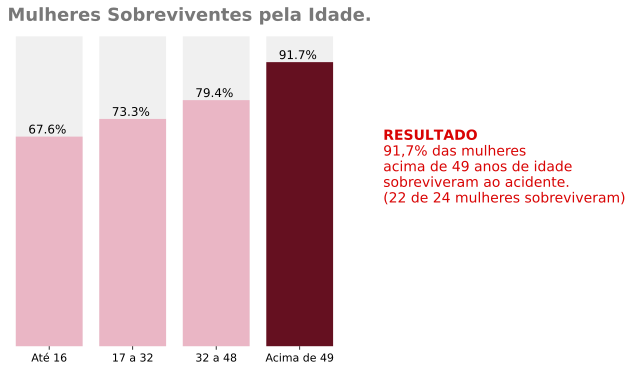

In [17]:
cores = ["#F2AEC1", "#F2AEC1", "#F2AEC1", '#730217']

dados_para_plotar = train[['IntervaloIdade', 'Survived', 'Sex']].groupby(['Sex', 'IntervaloIdade'], as_index=False).mean()

fig, ax = plt.subplots(figsize=(6,6))

sns.barplot(data=[[1],[1],[1],[1]], color="#F0F0F0")
figura = sns.barplot(x='IntervaloIdade', y='Survived', data=dados_para_plotar[dados_para_plotar.Sex == 0], palette=cores)

limpar_grafico(ax)

rep = 0
for p in figura.patches:
  rep += 1
  if rep < 5:
    continue
  else:
    figura.annotate('{:.1f}%'.format(p.get_height()*100),  (p.get_x()+ p.get_width()/2-0.25, p.get_height()+0.01), size=12)

plt.text(-0.5,1.05, 'Mulheres Sobreviventes pela Idade.',
         fontsize=18, 
         color='#787878',
         weight='bold')

plt.text(4, 0.7,
         '$\\bf{RESULTADO}$\n'
         '91,7% das mulheres\n'
         'acima de 49 anos de idade\n'
         'sobreviveram ao acidente.\n'
         '(22 de 24 mulheres sobreviveram)',
         verticalalignment="top",
         fontsize=14,
         color='#D90404')

ax.set_xticklabels(['Até 16', '17 a 32', '32 a 48', 'Acima de 49'], size=11);

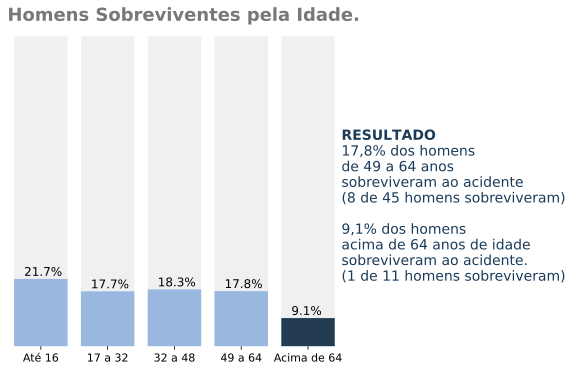

In [18]:
cores = ["#8db7eb", "#8db7eb", "#8db7eb", "#8db7eb", '#1B3B59']

dados_para_plotar = train[['IntervaloIdade', 'Survived', 'Sex']].groupby(['Sex', 'IntervaloIdade'], as_index=False).mean()

fig, ax = plt.subplots(figsize=(6,6))

sns.barplot(data=[[1],[1],[1],[1],[1]], color="#F0F0F0")
figura = sns.barplot(x='IntervaloIdade', y='Survived', data=dados_para_plotar[dados_para_plotar.Sex == 1], palette=cores)

limpar_grafico(ax)

rep = 0
for p in figura.patches:
  rep += 1
  if rep < 6:
    continue
  else:
    figura.annotate('{:.1f}%'.format(p.get_height()*100),  (p.get_x()+ p.get_width()/2-0.25, p.get_height()+0.01), size=12)

plt.text(-0.5,1.05, 'Homens Sobreviventes pela Idade.',
         fontsize=18, 
         color='#787878',
         weight='bold')

plt.text(4.5, 0.7,
         '$\\bf{RESULTADO}$\n'
         '17,8% dos homens\n'
         'de 49 a 64 anos\n'
         'sobreviveram ao acidente\n'
         '(8 de 45 homens sobreviveram)\n\n'
         '9,1% dos homens\n'
         'acima de 64 anos de idade\n'
         'sobreviveram ao acidente.\n'
         '(1 de 11 homens sobreviveram)',
         verticalalignment="top",
         fontsize=14,
         color='#1B3B59')

ax.set_xticklabels(['Até 16', '17 a 32', '32 a 48', '49 a 64', 'Acima de 64'], size=11);

## Q11. Qual a chance de sobrevivência de acordo com a quantidade de parentes vivos?

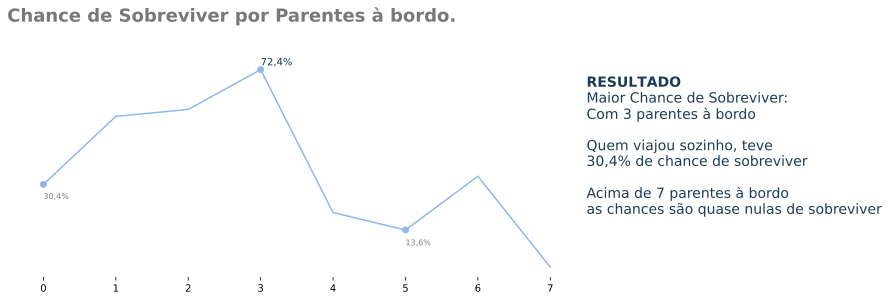

In [19]:
train['qnt_parentes'] = train['SibSp'] + train['Parch']
dados_para_plotar = train[['qnt_parentes', 'Survived']].groupby(['qnt_parentes'], as_index=False).mean()[:8]

fig, ax = plt.subplots(figsize=(10,4))

figura = plt.plot(dados_para_plotar.qnt_parentes, dados_para_plotar.Survived, markevery=[0,3,5], ms = 6, marker='o', color="#8db7eb")

plt.text(-0.5,0.9, 'Chance de Sobreviver por Parentes à bordo.',
         fontsize=18, 
         color='#787878',
         weight='bold')

plt.text(7.5, 0.7,
         '$\\bf{RESULTADO}$\n'
         'Maior Chance de Sobreviver:\n'
         'Com 3 parentes à bordo\n\n'
         'Quem viajou sozinho, teve\n'
         '30,4% de chance de sobreviver\n\n'
         'Acima de 7 parentes à bordo\n'
         'as chances são quase nulas de sobreviver\n',
         verticalalignment="top",
         fontsize=14,
         color='#1B3B59')

plt.text(0, 0.25, '30,4%', fontsize = 8, color='grey')
plt.text(3, 0.74, '72,4%', fontsize = 10, color='#1B3B59')
plt.text(5, 0.08, '13,6%', fontsize = 8, color = 'grey')

limpar_grafico(ax)

## Q12. Qual a chance de sobrevivência de acordo com a origem de embarque?

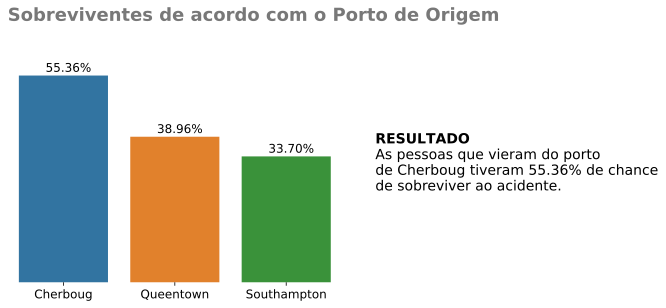

In [20]:
dados_para_plotar = train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()[1:]

fig, ax = plt.subplots(figsize=(6,4))

figura = sns.barplot(x='Embarked', y='Survived', data=dados_para_plotar)

limpar_grafico(ax)

for p in figura.patches:
    figura.annotate('{:.2f}%'.format(p.get_height()*100),  (p.get_x()+ p.get_width()/2-0.16, p.get_height()+0.01), size=12)

plt.text(-0.5,0.7, 'Sobreviventes de acordo com o Porto de Origem',
         fontsize=18, 
         color='#787878',
         weight='bold')

plt.text(2.8, 0.4,
         '$\\bf{RESULTADO}$\n'
         'As pessoas que vieram do porto\n'
         'de Cherboug tiveram 55.36% de chance\n'
         'de sobreviver ao acidente.',
         verticalalignment="top",
         fontsize=14)

ax.set_xticklabels(['Cherboug', 'Queentown', 'Southampton'], size=12);

## Q13. Qual a Chance de sobrevivência de acordo com o Titulo?

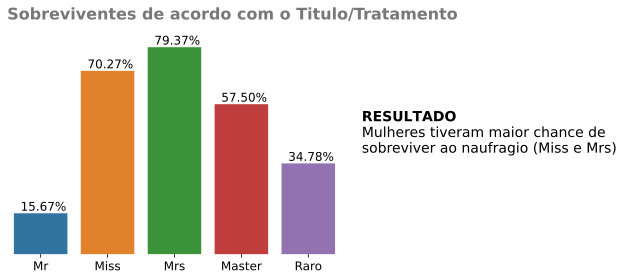

In [21]:
fig, ax = plt.subplots(figsize=(6,4))

dados_para_plotar = train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values('Survived')

figura = sns.barplot(x='Title', y='Survived', data=dados_para_plotar)

for p in figura.patches:
    figura.annotate('{:.2f}%'.format(p.get_height()*100),  (p.get_x()+ p.get_width()/2-0.3, p.get_height()+0.01), size=12)

limpar_grafico(ax)

plt.text(-0.5,0.9, 'Sobreviventes de acordo com o Titulo/Tratamento',
         fontsize=16, 
         color='#787878',
         weight='bold')

plt.text(4.8, 0.55,
         '$\\bf{RESULTADO}$\n'
         'Mulheres tiveram maior chance de\n'
         'sobreviver ao naufragio (Miss e Mrs)',
         verticalalignment="top",
         fontsize=14)

ax.set_xticklabels(['Mr', 'Miss', 'Mrs', 'Master', 'Raro'], size=12);

## Segunda Correção:

In [22]:
combinar = [train, test]

for dataset in combinar:
  #Retirando as colunas desnecessárias:
  dataset.drop(['Embarked', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Name'], axis = 1, inplace=True)

train.drop(['qnt_parentes'], axis = 1, inplace = True)

# Elaboração de Modelos de ML:
## Gerando o subconjunto de treino teste.

In [23]:
#Seleciona as variáveis que serão utilizadas no modelo:
variaveis = ['Pclass', 'Sex', 'Age', 'Fare', 'Embark', 'Sozinho', 'Title', 'IntervaloIdade']

#Corta o Data Frame para as variáveis selecionadas:
X = train[variaveis].fillna(-1)
y = train['Survived']

In [24]:
X_train = train[variaveis]
X_train.fillna(-1, inplace = True)
y_train = train.Survived

X_test = test[variaveis]
X_test.fillna(-1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


## Pré Processamentos Utilizados:

In [25]:
# Cross Validation - Validação Cruzada:

from sklearn.model_selection import cross_validate

## Modelos Utilizados:

In [26]:
# Classificação Supervisionada:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#MLA -> Machine Learning Algorithms (Algoritmos de Machine Learning):

MLA = [#Modelos Ensemble:
       AdaBoostClassifier(),
       GradientBoostingClassifier(),
       RandomForestClassifier(n_estimators=10, n_jobs=1, random_state=0), 

       #Modelos Lineares:
       LogisticRegression(max_iter=1000),

       #Naive Bayes:
       GaussianNB(),
       
       #KNN:
       KNeighborsClassifier(),

       #Decision Tree Classifier:
       DecisionTreeClassifier(),

       #SVC:
       SVC(max_iter=10000),
       
       #XGB:
       XGBClassifier(max_iter=1000)]

## Modelos:

In [27]:
#Elaborando previsões para diversos modelos e comparando entre eles:

MLA_df = pd.DataFrame(columns = ['MLA Nome', 'Acuracia Treino', 'Acuracia Teste'])

linha = 0

for alg in MLA:
  cv_resultados = cross_validate(alg, X, y, cv=10, return_train_score=True)
  
  MLA_df.loc[linha, 'MLA Nome'] = alg.__class__.__name__
  MLA_df.loc[linha, 'Acuracia Treino'] = cv_resultados['train_score'].mean()
  MLA_df.loc[linha, 'Acuracia Teste'] = cv_resultados['test_score'].mean()

  linha += 1
MLA_df

,MLA Nome,Acuracia Treino,Acuracia Teste
0,AdaBoostClassifier,0.841377,0.818215
1,GradientBoostingClassifier,0.901984,0.835081
2,RandomForestClassifier,0.969447,0.817129
3,LogisticRegression,0.787755,0.769913
4,GaussianNB,0.783388,0.773358
5,KNeighborsClassifier,0.809453,0.707116
6,DecisionTreeClassifier,0.98541,0.78568
7,SVC,0.681632,0.679101
8,XGBClassifier,0.890637,0.830587


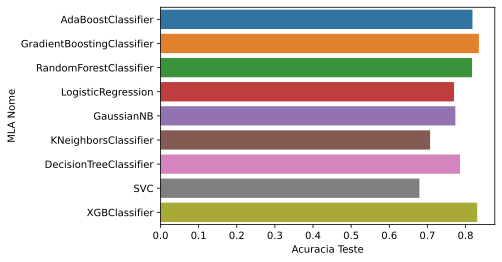

In [28]:
ax = sns.barplot(x = 'Acuracia Teste', y = 'MLA Nome', data = MLA_df)

###Decision Tree Classifier:

Visualizando os notebooks do Titanic, foi visto que um dos notebooks utilizou a Decision Tree Classifier para a predição. Porém, sem utilizar a variável de Idade.

In [29]:
X_dec = X.drop('Age', axis = 1)
modelo = cross_validate(DecisionTreeClassifier(min_samples_leaf=5, max_depth=3), X_dec, y, cv=4)
modelo['test_score'].mean().round(3)

0.822

###Deep Learning

In [30]:
import tensorflow as tf
from tensorflow import keras

X_deep_train = train.drop(['Survived', 'PassengerId', 'Age', 'IntervaloIdade'], axis = 1)
#X_deep_valid = train.drop(['Survived', 'PassengerId'], axis = 1)
y_deep_train = train.Survived
#y_deep_valid = train.Survived[:200]

model = keras.models.Sequential()
model.add(keras.layers.Dense(1000, activation='sigmoid'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Dense(50, activation='softmax'))

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(X_deep_train, y_deep_train, epochs=10, validation_split=0.3)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

20/20 [==============================] - 0s 13ms/step - loss: 3.3985 - accuracy: 0.5570 - val_loss: 2.9570 - val_accuracy: 0.2873
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 2.9277 - accuracy: 0.6421 - val_loss: 2.7006 - val_accuracy: 0.7201
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 2.7317 - accuracy: 0.6677 - val_loss: 2.4168 - val_accuracy: 0.7799
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 2.4964 - accura

## Buscando Randomização:

O código abaixo tem como finalidade buscar randomizar a seleção das variáveis para buscar o melhor modelo preditivo possível. Lembrando que na hora de submeter a previsão, a acurácia não será a mesma.

In [31]:
import random

#Gerando um novo Dataset sem o PassengerId e a variável Survived:
new_train = train.drop(['PassengerId', 'Survived'], axis = 1)
y_train = train.Survived

#Inicializando variáveis de controle:
rep = 0
rep_alg = 0
melhor_acuracia = 0

#Laço de Repetição envolvendo a seleção de variáveis:
while rep < 20:
  #Seleciona "n" variáveis aleatórias apra analisar:
  n = random.randint(1, 12)
  rand_train = new_train.sample(n=n, axis = 1)

  #Laço de Repetição para os Algoritmos de ML:
  for alg in MLA:
    #Faz Cross Validation com o algoritmo e o dataset randomizado:
    cv_resultados = cross_validate(alg, rand_train, y_train, cv=5, return_train_score=True)

    #Seleciona a média da acuracia do modelo
    acuracia_alg = cv_resultados['test_score'].mean()
    rep_alg += 1

    #Compara se a acuracia calculada é melhor apresentada:
    if acuracia_alg > melhor_acuracia:
      #Sobrescreve a melhor acuracia:
      melhor_acuracia = acuracia_alg

      #Imprime os melhores resultados até então:
      print('-'*40)
      print(alg.__class__.__name__, ':', rep, '-', rep_alg)
      print(new_train.columns)
      print(acuracia_alg)

  rep += 1

----------------------------------------
AdaBoostClassifier : 0 - 1
Index(['Pclass', 'Sex', 'Age', 'Fare', 'Title', 'Embark', 'Sozinho', 'Mr',
       'Miss', 'Mrs', 'Master', 'Raro', 'IntervaloIdade'],
      dtype='object')
0.8125980792166217
----------------------------------------
GradientBoostingClassifier : 0 - 2
Index(['Pclass', 'Sex', 'Age', 'Fare', 'Title', 'Embark', 'Sozinho', 'Mr',
       'Miss', 'Mrs', 'Master', 'Raro', 'IntervaloIdade'],
      dtype='object')
0.8316740945326722
----------------------------------------
GradientBoostingClassifier : 6 - 56
Index(['Pclass', 'Sex', 'Age', 'Fare', 'Title', 'Embark', 'Sozinho', 'Mr',
       'Miss', 'Mrs', 'Master', 'Raro', 'IntervaloIdade'],
      dtype='object')
0.8394953235829515


#Criando a Subscrição:

Com as possíveis variáveis "experimentadas" é necessário submeter o modelo preditivo para o Kaggle e obter os possíveis resultados.

##Subscrição de Gradient Bossting Classifier:

In [32]:
modelo = GradientBoostingClassifier()
modelo.fit(X, y)

y_pred = modelo.predict(X_test)

sub = pd.Series(y_pred, index = test['PassengerId'], name= 'Survived')
sub.to_csv("GradientBoostingClassifier.csv", header=True)

In [33]:
X = train[['Pclass', 'Sex', 'Age', 'Fare', 'Title', 'Embark', 'Sozinho', 'Mr',
       'Miss', 'Mrs', 'Master', 'Raro']]
y = train.Survived

modelo = GradientBoostingClassifier()
modelo.fit(X, y)
y_pred = modelo.predict(test[['Pclass', 'Sex', 'Age', 'Fare', 'Title', 'Embark', 'Sozinho', 'Mr',
       'Miss', 'Mrs', 'Master', 'Raro']])

sub = pd.Series(y_pred, index = test['PassengerId'], name= 'Survived')
sub.to_csv("GradientBC1.csv", header=True)

##Subscrição de XGBClassifier:

In [34]:
modelo = XGBClassifier()
modelo.fit(X, y)

y_pred = modelo.predict(test[['Pclass', 'Sex', 'Age', 'Fare', 'Title', 'Embark', 'Sozinho', 'Mr',
       'Miss', 'Mrs', 'Master', 'Raro']])

sub = pd.Series(y_pred, index = test['PassengerId'], name= 'Survived')
sub.to_csv("XGBClassifier.csv", header=True)

## Subscrição de Decision Tree Classifier:

In [35]:
X = train.drop(['PassengerId', 'Survived', 'Age', 'IntervaloIdade'], axis = 1)
y = train.Survived
modelo = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)
modelo.fit(X, y)

y_pred = modelo.predict(test.drop(['PassengerId', 'Age', 'IntervaloIdade'], axis=1))

sub = pd.Series(y_pred, index = test['PassengerId'], name= 'Survived')
sub.to_csv("DecisionTreeClassifier.csv", header=True)

#Resultados no Kaggle:

Como dito anteriormente, os modelos criados possuem acuracias diferentes na submissão quando comparados com a acuracia obtida no notebbok:

![](https://github.com/GabrielTrentino/Competicoes/blob/master/img/0Titanic-ResultadosKaggle.png?raw=true)

# **Dúvidas e Redes Sociais:**
O repositório aumentará o seu tamanho de acordo com as realizações dos cursos. E claro, aceito recomendações de cursos, livros ou vídeos! Qualquer duvida me chame no [LinkedIn](https://www.linkedin.com/in/gabriel-trentino-froes-415558144/).